# 1.) Pull in Data and Convert ot Monthly

In [96]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [97]:
apple_data = yf.download('AAPL')
df = apple_data.resample("M").last()[["Adj Close"]]

[*********************100%***********************]  1 of 1 completed


# 2.) Create columns. 
  - Current Stock Price, Difference in stock price, Whether it went up or down over the next month,  option premium

In [98]:
df
#Differnce in stockprice
df["Diff"] = df["Adj Close"].diff().shift(-1)


In [99]:
df.head()

,Adj Close,Diff
Date,,
1980-12-31 00:00:00-05:00,0.117887,-0.020296
1981-01-31 00:00:00-05:00,0.097591,-0.006045
1981-02-28 00:00:00-05:00,0.091546,-0.006909
1981-03-31 00:00:00-05:00,0.084637,0.013386
1981-04-30 00:00:00-04:00,0.098023,0.016409


In [100]:
#Target up or down
df["Target"]= np.sign(df["Diff"])

In [101]:
#Option premium ( if it a true postive )
df["Premium"] = .08 *df["Adj Close"]
df

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31 00:00:00-05:00,0.117887,-0.020296,-1.0,0.009431
1981-01-31 00:00:00-05:00,0.097591,-0.006045,-1.0,0.007807
1981-02-28 00:00:00-05:00,0.091546,-0.006909,-1.0,0.007324
1981-03-31 00:00:00-05:00,0.084637,0.013386,1.0,0.006771
1981-04-30 00:00:00-04:00,0.098023,0.016409,1.0,0.007842
...,...,...,...,...
2023-09-30 00:00:00-04:00,170.984741,-0.439423,-1.0,13.678779
2023-10-31 00:00:00-04:00,170.545319,19.404678,1.0,13.643625
2023-11-30 00:00:00-05:00,189.949997,2.580002,1.0,15.196000


# 3.) Pull in X data, normalize and build a LogReg on column 2

In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [103]:
X = pd.read_csv("Xdata.csv", index_col="Date", parse_dates=["Date"])

In [104]:
y = df.loc[:"2023-09-30","Target"].copy()
df = df.loc[:"2023-09-30",:].copy()
df.head()

,Adj Close,Diff,Target,Premium
Date,,,,
1980-12-31 00:00:00-05:00,0.117887,-0.020296,-1.0,0.009431
1981-01-31 00:00:00-05:00,0.097591,-0.006045,-1.0,0.007807
1981-02-28 00:00:00-05:00,0.091546,-0.006909,-1.0,0.007324
1981-03-31 00:00:00-05:00,0.084637,0.013386,1.0,0.006771
1981-04-30 00:00:00-04:00,0.098023,0.016409,1.0,0.007842


In [105]:
log_reg = LogisticRegression().fit(X,y)

In [106]:
y_pred = log_reg.predict(X)

# 4.) Add columns, prediction and profits.

In [108]:
df["Predictions"] = y_pred

In [113]:
df["Profits"] = 0

In [114]:
#true positives 
df.loc[(df["Predictions"]==1)&(df["Target"]==1), "Profits"] =  df["Premium"]

In [115]:
#false positives 
df.loc[(df["Predictions"]==1)&(df["Target"]==-1), "Profits"] = 100*df["Diff"] + df["Premium"]

In [117]:
df

,Adj Close,Diff,Target,Premium,Predictions,profits,Profits
Date,,,,,,,
1980-12-31 00:00:00-05:00,0.117887,-0.020296,-1.0,0.009431,-1.0,0,0.000000
1981-01-31 00:00:00-05:00,0.097591,-0.006045,-1.0,0.007807,-1.0,0,0.000000
1981-02-28 00:00:00-05:00,0.091546,-0.006909,-1.0,0.007324,-1.0,0,0.000000
1981-03-31 00:00:00-05:00,0.084637,0.013386,1.0,0.006771,1.0,0,0.006771
1981-04-30 00:00:00-04:00,0.098023,0.016409,1.0,0.007842,1.0,0,0.007842
...,...,...,...,...,...,...,...
2023-05-31 00:00:00-04:00,176.778061,16.675507,1.0,14.142245,1.0,0,14.142245
2023-06-30 00:00:00-04:00,193.453568,2.473389,1.0,15.476285,1.0,0,15.476285
2023-07-31 00:00:00-04:00,195.926956,-8.304138,-1.0,15.674156,-1.0,0,0.000000


# 5.) Plot profits over time

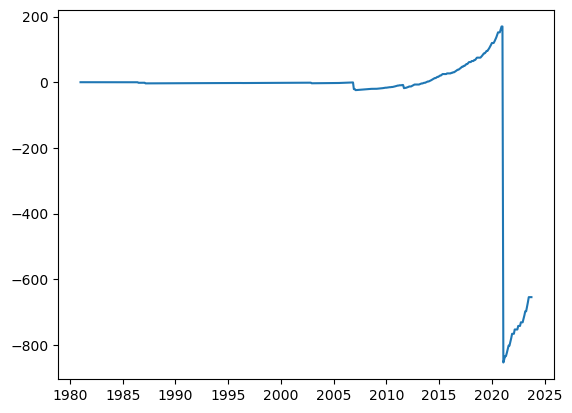

In [116]:
plt.plot(np.cumsum(df["Profits"]))
plt.show()

In [ ]:
# how could the skills that could help the speaker? 

In [ ]:
#I could use cloud computing and ML course to help the speaker .

# 6.) Create a loop that stores total profits over time

# 7.) What is the optimal threshold and plot the total profits for this model.